In [ ]:
# Name Yash Thakur
# Roll No. B - 75
# DS - Assignment - 4

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
boston_data=pd.read_csv('housing.csv')
boston_data.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [8]:
boston_data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [9]:
boston_data.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [10]:
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [11]:
boston_data.shape

(489, 4)

In [17]:
X = boston_data[[ 'RM','PTRATIO','LSTAT']]
y = boston_data['MEDV']

<Figure size 1000x600 with 0 Axes>

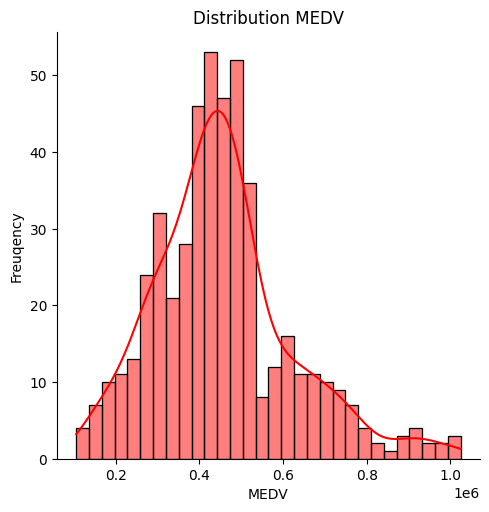

In [19]:
plt.figure(figsize=(10,6))
sns.displot(boston_data['MEDV'],bins=30,kde=True,color='RED')
plt.title('Distribution MEDV')
plt.xlabel('MEDV')
plt.ylabel('Freuqency')
plt.show()


<Axes: title={'center': 'Correlation of Heatmap'}>

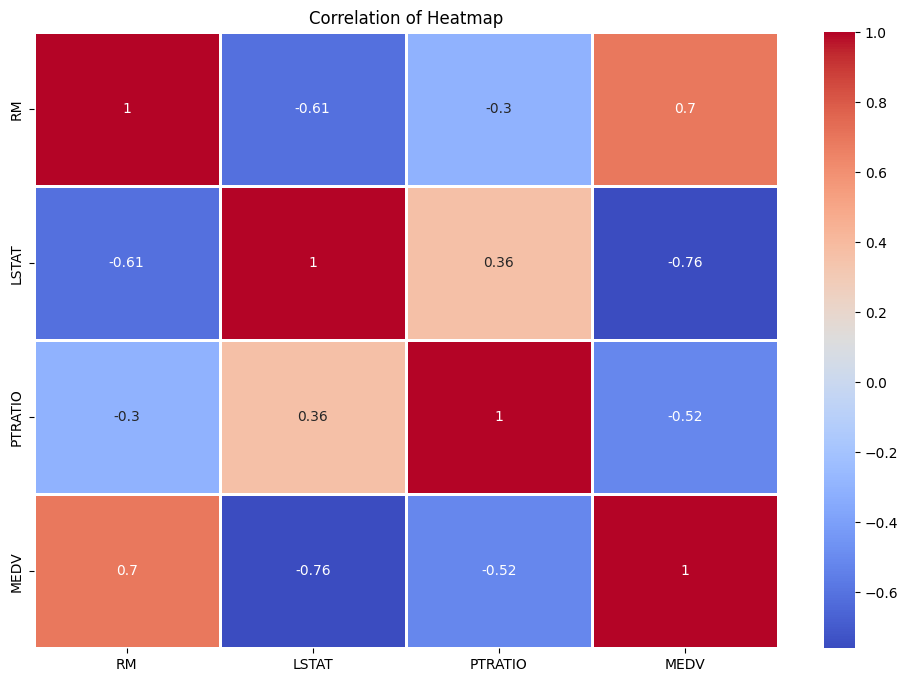

In [20]:
plt.figure(figsize=(12,8))
plt.title('Correlation of Heatmap')
sns.heatmap(boston_data.corr(),cmap='coolwarm',annot=True,linewidth=1)

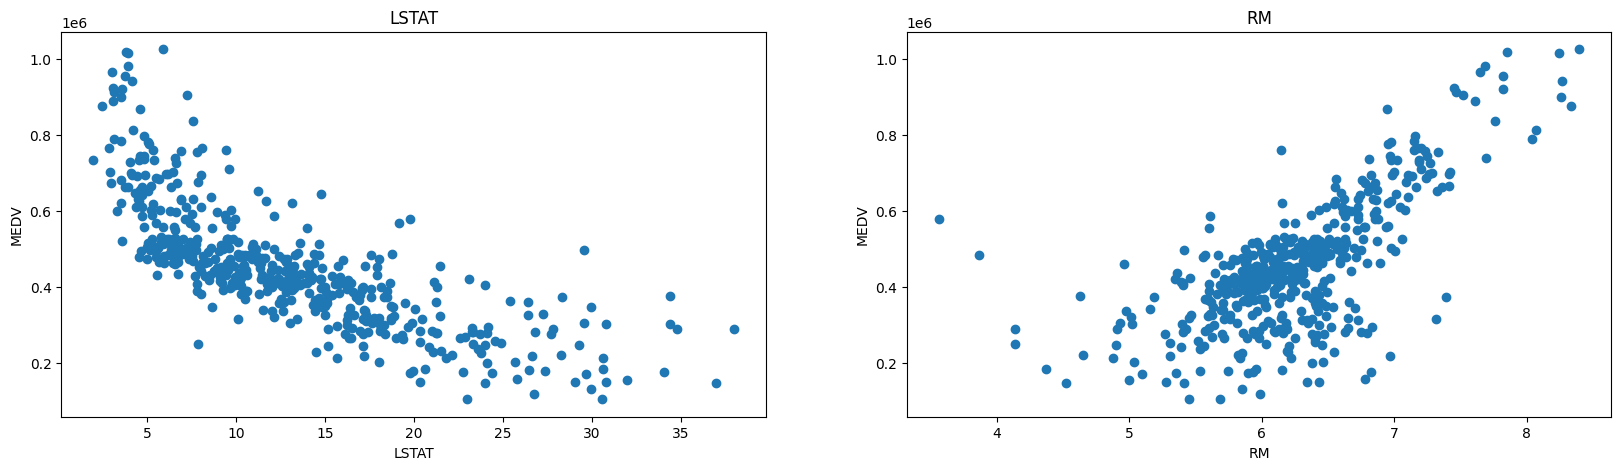

In [22]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston_data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

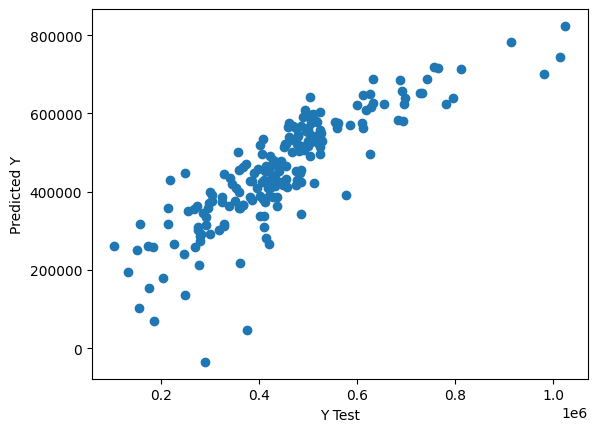

In [28]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [29]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 62055.13976630828
MSE: 7066532456.130406
RMSE: 84062.66981324354


In [30]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
RM,79120.750676
PTRATIO,-20534.570617
LSTAT,-11652.548137
